In [1]:
import glob
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

path = './Face Mask Dataset/'
files = [f for f in glob.glob(path + "*/*/*.png", recursive=True)]

In [2]:
label_map = {'WithoutMask':0,
             'WithMask':1,}
label = [label_map[file.rsplit('/', 2)[1]] for file in files]

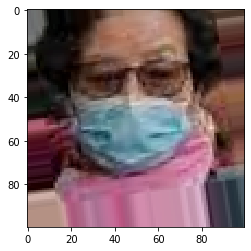

<class 'numpy.ndarray'>
(100, 100, 3)


(100, 100, 3)

In [3]:
images = np.full((11792, 100, 100, 3), 0)
i = 0
image = Image.open(files[0])
help = np.array(image.resize((100,100), Image.ANTIALIAS))
plt.figure()
plt.imshow(help) 
plt.show() 
print(type(help))
print(help.shape)

for file in files:
    image = Image.open(file)
    images[i] = np.array(image.resize((100,100), Image.ANTIALIAS))
    i += 1
images[0].shape

(11792, 100, 100, 3)
1


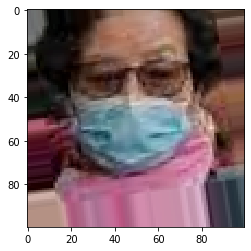

In [4]:
print(images.shape)
print(label[0])
plt.figure()
plt.imshow(images[0]) 
plt.show() 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.33, random_state=50, shuffle=True)

0
7900


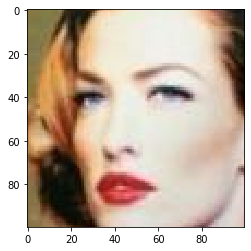

In [6]:
index = 0
plt.imshow(X_train[index])
print(y_train[index])
print(len(X_train))

In [7]:
y_train = np.resize(np.array(y_train), (1, 7900))
y_test = np.resize(np.array(y_test), (1, 3892))

In [8]:
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(X_train.shape))
print ("train_y shape: " + str(np.array(y_train).shape))
print ("test_x_orig shape: " + str(X_test.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 7900
Number of testing examples: 3892
Each image is of size: (100, 100, 3)
train_x_orig shape: (7900, 100, 100, 3)
train_y shape: (1, 7900)
test_x_orig shape: (3892, 100, 100, 3)
test_y shape: (1, 3892)


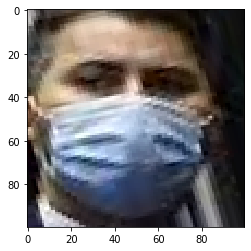

In [9]:
x_train = X_train / 255.0
x_test = X_test / 255.0
plt.imshow(x_train[1])
#X_train

In [10]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1).T
X_test_flattened = X_test.reshape(X_test.shape[0], -1).T


print ("train_x's shape: " + str(X_train_flattened.shape))
print ("test_x's shape: " + str(X_test_flattened.shape))

train_x's shape: (30000, 7900)
test_x's shape: (30000, 3892)


In [ ]:
#x_train = np.empty([30000, 7900])
#x_test = np.empty([30000, 3892])

#i = 0
#for image in X_train_flattened:
#    x_train[i] = X_train_flattened[i] / 255
#    i += 1
    
#i = 0
#for image in X_test_flattened:
#    x_test[i] = X_test_flattened[i] / 255
#    i += 1

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(64, activation = "linear"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(64, activation = "linear"),
    keras.layers.Dense(32, activation = "relu"),
    #keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = "sigmoid")
])

In [12]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001) # default = 0.001 bei Adam
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

In [13]:
print(x_train.shape)
print(y_train.shape)

(7900, 100, 100, 3)
(1, 7900)


In [14]:
y_train = y_train.reshape(7900,1)
x_train = x_train.reshape(7900, 30000)
y_test = y_test.reshape(3892,1)
x_test = x_test.reshape(3892, 30000)

In [15]:
print(x_train.shape)
print(y_train.shape)

(7900, 30000)
(7900, 1)


In [16]:
x_train

array([[0.5254902 , 0.4745098 , 0.27058824, ..., 0.85490196, 0.74117647,
        0.70980392],
       [0.75294118, 0.74117647, 0.7372549 , ..., 0.0745098 , 0.0745098 ,
        0.08235294],
       [0.65882353, 0.55294118, 0.41176471, ..., 0.67058824, 0.41960784,
        0.29411765],
       ...,
       [0.99215686, 0.91372549, 0.90980392, ..., 0.25882353, 0.16078431,
        0.17254902],
       [0.88627451, 0.89411765, 0.88627451, ..., 0.58039216, 0.4745098 ,
        0.40784314],
       [0.96078431, 0.96470588, 0.97254902, ..., 0.83137255, 0.65490196,
        0.5254902 ]])

In [17]:
model.fit(x_train, y_train, epochs = 25, batch_size = 128, verbose = 1)#, epochs = 50, batch_size = 128)

Epoch 1/25
62/62 [==============================] - 1s 10ms/step - loss: 0.5228 - accuracy: 0.7932
Epoch 2/25
62/62 [==============================] - 1s 10ms/step - loss: 0.2380 - accuracy: 0.9077
Epoch 3/25
62/62 [==============================] - 1s 10ms/step - loss: 0.2003 - accuracy: 0.9203
Epoch 4/25
62/62 [==============================] - 1s 10ms/step - loss: 0.1446 - accuracy: 0.9432
Epoch 5/25
62/62 [==============================] - 1s 10ms/step - loss: 0.1952 - accuracy: 0.9235
Epoch 6/25
62/62 [==============================] - 1s 10ms/step - loss: 0.1809 - accuracy: 0.9320
Epoch 7/25
62/62 [==============================] - 1s 10ms/step - loss: 0.1388 - accuracy: 0.9461
Epoch 8/25
62/62 [==============================] - 1s 10ms/step - loss: 0.1335 - accuracy: 0.9505
Epoch 9/25
62/62 [==============================] - 1s 10ms/step - loss: 0.1316 - accuracy: 0.9494
Epoch 10/25
62/62 [==============================] - 1s 10ms/step - loss: 0.0963 - accuracy: 0.9634
Epoch 11/

In [18]:
loss, accuracy = model.evaluate(x_train, y_train, batch_size = 128, verbose = 1)

62/62 [==============================] - 0s 6ms/step - loss: 0.0474 - accuracy: 0.9827


In [19]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size = 128, verbose = 1)

31/31 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9705


In [20]:
model.save('./Model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./Model/assets


In [ ]:
tf.__version__

In [21]:
model = keras.models.load_model('./Model/')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                960032    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3

In [22]:
print(model.predict(x_test[1].reshape(1, 30000)))
print(y_test[1])

[[7.758436e-05]]
[0]
